In [1]:
import datetime
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import tables
from tqdm import tqdm
%matplotlib inline
import random
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# time vs probability correct
# interbout interval in conditions
# interbout interval histogram
#

In [3]:
df = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_preprocessed.hdf5")
df['duration'] = df['duration'].astype(np.float64)
df['distance_change'] = df['distance_change'].astype(np.float64)
df['bout_orientation'] = df['bout_orientation'].astype(np.float64)
#df.reset_index(inplace = True,drop = True)
print('done all data')

done all data


In [60]:
df

,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,start_time,...,radius,time,left_bouts,right_bouts,straight_bouts,bout_orientation,bout_orientation_absolute,left_bouts_absolute,right_bouts_absolute,ring_membership
0,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,6.618944,...,0.680450,6.741165,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0
1,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,8.507818,...,0.689678,8.552262,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0
2,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,12.518896,...,0.739272,12.607784,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0
3,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,13.052225,...,0.758108,13.196668,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0
4,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,13.541110,...,0.786610,13.729997,0.0,1.0,0.0,1.0,1.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631920,1,7,0,105,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_forward,16,32.084102,...,0.911741,32.661875,1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,8.0
631921,1,7,0,105,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_forward,16,32.884096,...,0.911823,33.250759,0.0,0.0,1.0,0.0,1.0,0.0,1.0,8.0
631922,1,7,0,105,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_forward,16,33.317425,...,0.912315,33.572979,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,8.0
631923,1,7,0,105,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_forward,16,33.706311,...,0.914938,34.184085,0.0,0.0,1.0,0.0,1.0,0.0,1.0,8.0


In [59]:
df.drop(['index'],inplace = True,axis = 1)

In [28]:
plt.rcParams["figure.figsize"] = (9,6)
stim = df['stimulus_name'].unique().tolist()
for stimulus in stim:
    df_subset =df[df['stimulus_name']==stimulus]
    df_maximums = df_subset.groupby(['fish_ID']).max()
    print('Number of trials for stimulus '+str(stimulus)+': ' +str(sum(df_maximums['trial'])))
    print('Number of fish: ' + str(len(df_maximums)))
    bin_df_subset = bin_data(label_df= df_subset, bin_size = 1,subset = False)
    bin_df_again = bin_df_subset.groupby(['binned_time']).sum()
    bin_df_again.reset_index(inplace = True)
    plt.plot(bin_df_again['binned_time'],bin_df_again['total_bouts'])
    plt.scatter([0,0],[1100,2800], color = 'dimgray')
    plt.title('Trial stimulus '+str(stimulus),size = 15)
    plt.xlabel('binned time',size = 15)
    plt.ylabel('total bouts', size = 15)
    plt.show() # 2800 1100

Number of trials for stimulus gray: 1643
Number of fish: 106


ValueError: cannot insert level_0, already exists

In [ ]:
# All the same for bout distance traveled?

plt.rcParams["figure.figsize"] = (9,6)
stim = df['stimulus_name'].unique().tolist()
for stimulus in stim:
    df_subset =df[df['stimulus_name']==stimulus]
    df_maximums = df_subset.groupby(['fish_ID']).max()
    print('Number of trials for stimulus '+str(stimulus)+': ' +str(sum(df_maximums['trial'])))
    print('Number of fish: ' + str(len(df_maximums)))
    bin_df_subset = bin_data(label_df= df_subset, bin_size = 1,subset = False)
    bin_df_again = bin_df_subset.groupby(['binned_time']).mean()  # again the mean
    bin_df_again.reset_index(inplace = True)
    plt.plot(bin_df_again['binned_time'],bin_df_again['distance_change'])
    plt.scatter([0,0],[0.03,0.08], color = 'dimgray')
    plt.title('Trial stimulus '+str(stimulus),size = 15)
    plt.xlabel('binned time',size = 15)
    plt.ylabel('Distance traveled mean of mean', size = 15)
    plt.show() # 2800 1100

In [ ]:
# All the same for bout distance bout duration?

plt.rcParams["figure.figsize"] = (9,6)
stim = df['stimulus_name'].unique().tolist()
for stimulus in stim:
    df_subset =df[df['stimulus_name']==stimulus]
    df_maximums = df_subset.groupby(['fish_ID']).max()
    print('Number of trials for stimulus '+str(stimulus)+': ' +str(sum(df_maximums['trial'])))
    print('Number of fish: ' + str(len(df_maximums)))
    bin_df_subset = bin_data(label_df= df_subset, bin_size = 1,subset = False)
    bin_df_again = bin_df_subset.groupby(['binned_time']).mean()  # again the mean
    bin_df_again.reset_index(inplace = True)
    plt.plot(bin_df_again['binned_time'],bin_df_again['duration'])
    plt.scatter([0,0],[0.12,0.20], color = 'dimgray')
    plt.title('Trial stimulus '+str(stimulus),size = 15)
    plt.xlabel('binned time',size = 15)
    plt.ylabel('Bout duration mean of mean', size = 15)
    plt.show() # 2800 1100

In [29]:
df

,setup_index,arena_index,experiment_repeat,fish_ID,fish_name,fish_genotype,fish_age,stimulus_name,trial,start_time,...,distance_change,estimated_orientation_change,average_speed,interbout_interval,same_direction_as_previous_bout,start_time_absolute,end_time_absolute,start_accumulated_orientation_windowed_variance,end_accumulated_orientation_windowed_variance,binned_time
0,0,0,0,16,2022-11-09_17-20-25_setup0_arena0,WT,5 dpf,60_plaid_0,3,32.899434,...,NaN,NaN,NaN,NaN,NaN,2022-11-09 17:23:58.383394560+01:00,2022-11-09 17:23:58.450060544+01:00,NaN,NaN,32.5
1,0,0,0,16,2022-11-09_17-20-25_setup0_arena0,WT,5 dpf,60_plaid_0,3,34.877196,...,0.031111,58.890305,0.215385,1.911096,0.0,2022-11-09 17:24:00.361156352+01:00,2022-11-09 17:24:00.505599488+01:00,NaN,NaN,35.5
2,0,0,0,16,2022-11-09_17-20-25_setup0_arena0,WT,5 dpf,60_plaid_0,4,19.086126,...,0.036542,70.626675,0.205551,44.066309,1.0,2022-11-09 17:24:44.571908864+01:00,2022-11-09 17:24:44.749685248+01:00,NaN,NaN,19.5
3,0,0,0,16,2022-11-09_17-20-25_setup0_arena0,WT,5 dpf,60_plaid_0,4,20.141673,...,0.007229,6.385437,0.162663,0.877771,1.0,2022-11-09 17:24:45.627456+01:00,2022-11-09 17:24:45.671900160+01:00,NaN,NaN,20.5
4,0,0,0,16,2022-11-09_17-20-25_setup0_arena0,WT,5 dpf,60_plaid_0,4,20.908333,...,0.006540,5.680229,0.14715,0.722216,1.0,2022-11-09 17:24:46.394116352+01:00,2022-11-09 17:24:46.438560512+01:00,NaN,NaN,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946876,2,6,0,214,2022-12-15_14-26-30_setup2_arena6,WT,5 dpf,45_plaid_90,6,54.277176,...,0.050154,85.286451,0.237573,1.099991,1.0,2022-12-15 14:51:25.005240320+01:00,2022-12-15 14:51:25.216349696+01:00,4.204704,0.815251,54.5
1946877,2,6,0,214,2022-12-15_14-26-30_setup2_arena6,WT,5 dpf,45_plaid_90,6,54.988281,...,0.027776,17.199181,0.156241,0.499996,1.0,2022-12-15 14:51:25.716345600+01:00,2022-12-15 14:51:25.894121984+01:00,4.407185,1.260911,55.5
1946878,2,6,0,214,2022-12-15_14-26-30_setup2_arena6,WT,5 dpf,45_plaid_90,6,56.28827,...,0.056016,75.298556,0.265343,1.122213,1.0,2022-12-15 14:51:27.016335104+01:00,2022-12-15 14:51:27.227444480+01:00,6.452394,0.588535,56.5
1946879,2,6,0,214,2022-12-15_14-26-30_setup2_arena6,WT,5 dpf,45_plaid_90,6,57.899369,...,0.028417,1.756244,0.196734,1.399989,1.0,2022-12-15 14:51:28.627432960+01:00,2022-12-15 14:51:28.771876352+01:00,4.185439,0.643071,58.5


In [37]:
bin_df = df.groupby(['fish_ID', 'stimulus_name']).mean()

In [39]:
bin_df

level_0         index  setup_index  arena_index  \
fish_ID stimulus_name                                                         
0       60_plaid_0     3.324000e+03  3.626196e+03          2.0          1.0   
1       60_plaid_0     1.007350e+04  1.316028e+04          2.0          2.0   
2       60_plaid_0     1.771150e+04  2.157783e+04          2.0          3.0   
3       60_plaid_0     2.651650e+04  3.048962e+04          2.0          5.0   
4       60_plaid_0     3.465800e+04  3.899844e+04          2.0          6.0   
...                             ...           ...          ...          ...   
262     45_plaid_-45   1.483754e+06  1.807642e+06          2.0          6.0   
        45_plaid_-90   1.483624e+06  1.807964e+06          2.0          6.0   
        45_plaid_0     1.483781e+06  1.808332e+06          2.0          6.0   
        45_plaid_45    1.483841e+06  1.808614e+06          2.0          6.0   
        45_plaid_90    1.483594e+06  1.808896e+06          2.0          6.0   

                       experiment_repeat      trial  end_x_position  \
fish_ID stimulus_name                                                 
0       60_plaid_0                   0.0  51.772447        0.034334   
1       60_plaid_0                   0.0  63.294891        0.070688   
2       60_plaid_0                   0.0  60.069903        0.006514   
3       60_plaid_0                   0.0  59.435322        0.024625   
4       60_plaid_0                   0.0  63.653331        0.074830   
...                                  ...        ...             ...   
262     45_plaid_-45                 0.0   1.432331       -0.250847   
        45_plaid_-90                 0.0   3.026455       -0.256450   
        45_plaid_0                   0.0   3.379447        0.119998   
        45_plaid_45                  0.0   1.500000       -0.238454   
        45_plaid_90                  0.0   2.886297       -0.173691   

                       end_y_position  duration  distance_change    radius  \
fish_ID stimulus_name                                                        
0       60_plaid_0          -0.019524  0.159032         0.042235  0.737758   
1       60_plaid_0           0.055241  0.169428         0.053565  0.791536   
2       60_plaid_0           0.041825  0.150123         0.037770  0.774808   
3       60_plaid_0           0.026661  0.187417         0.053329  0.620875   
4       60_plaid_0          -0.119420  0.166456         0.040215  0.742663   
...                               ...       ...              ...       ...   
262     45_plaid_-45         0.039642  0.167751         0.054411  0.436041   
        45_plaid_-90        -0.028501  0.160375         0.041973  0.434205   
        45_plaid_0           0.135770  0.146156         0.041252  0.588038   
        45_plaid_45         -0.114193  0.161760         0.049378  0.462808   
        45_plaid_90         -0.079460  0.148914         0.034496  0.423616   

                       left_bouts  right_bouts  straight_bouts  \
fish_ID stimulus_name                                            
0       60_plaid_0       0.354189     0.425177        0.220635   
1       60_plaid_0       0.460438     0.304088        0.235474   
2       60_plaid_0       0.382507     0.333492        0.284002   
3       60_plaid_0       0.259691     0.553245        0.187064   
4       60_plaid_0       0.397521     0.329906        0.272574   
...                           ...          ...             ...   
262     45_plaid_-45     0.590226     0.255639        0.154135   
        45_plaid_-90     0.722222     0.198413        0.079365   
        45_plaid_0       0.300395     0.478261        0.221344   
        45_plaid_45      0.135135     0.747748        0.117117   
        45_plaid_90      0.241983     0.635569        0.122449   

                       bout_orientation  bout_orientation_absolute  \
fish_ID stimulus_name                                                
0       60_plaid_0             0.070988                   0.07

In [10]:
#ls = [df_gray,df_motion_downward,df_motion_forward,df_motion_leftdown45]

def bin_data(label_df, bin_size,subset): # why did i add name_of_data here???
    if subset != False:
        label_df = pd.concat(subset)
    time_index = label_df['end_time']
    label_df['binned_time'] = time_index - time_index % bin_size + bin_size / 2
    label_df = label_df.reset_index()
    bin_df = label_df.groupby(['fish_ID', 'stimulus_name', 'binned_time']).sum()
    bin_df['total_bouts'] = bin_df.left_bouts + bin_df.right_bouts + bin_df.straight_bouts
    #Analysed part:
    bin_df['preference_index'] = (bin_df.left_bouts - bin_df.right_bouts + bin_df.straight_bouts)/bin_df.total_bouts
    bin_df['percentage_left'] = (bin_df.left_bouts / bin_df.total_bouts)*100
    bin_df['percentage_right'] = (bin_df.right_bouts / bin_df.total_bouts)*100
    bin_df['percentage_straight'] = (bin_df.straight_bouts / bin_df.total_bouts)*100
    bin_df['orientation'] = bin_df.bout_orientation/bin_df.total_bouts

    bin_df['preference_absolute'] = ((bin_df.left_bouts_absolute -bin_df.right_bouts_absolute)/ bin_df.total_bouts)
   # bin_df.to_csv(r"C:\Users\ag-bahl\Desktop\dataframes\binned_df"+str(name_of_data)+".csv")
    return bin_df
bin_df = bin_data(label_df= df, bin_size = 1,subset = False)

In [11]:
bin_df #         self.bin_df['preference_aboslute'] = (self.bin_df.left_bouts_absolute - self.bin_df.right_bouts_absolute)/self.bin_df.total_bouts


level_0     index  setup_index  \
fish_ID stimulus_name   binned_time                                    
0       gray            0.5             12712      2077           12   
                        1.5             23497      4083           18   
                        2.5             18538      3058           20   
                        3.5             18867      3102           20   
                        4.5             20979      3567           22   
...                                       ...       ...          ...   
105     motion_leftward 45.5         11941771  15386918           19   
                        46.5         15726240  20263447           25   
                        47.5         13211576  17016382           21   
                        48.5         11947802  15395309           19   
                        49.5         11954804  15401229           19   

                                     arena_index  experiment_repeat  trial  \
fish_ID stimulus_name   binned_time                                          
0       gray            0.5                    0                  0     51   
                        1.5                    0                  0     97   
                        2.5                    0                  0     78   
                        3.5                    0                  0     77   
                        4.5                    0                  0     89   
...                                          ...                ...    ...   
105     motion_leftward 45.5                 133                  0    106   
                        46.5                 175                  0    109   
                        47.5                 147                  0    101   
                        48.5                 133                  0     91   
                        49.5                 133                  0     90   

                                      start_time  start_contour_area  \
fish_ID stimulus_name   binned_time                                    
0       gray            0.5             2.634997         2640.387100   
                        1.5            12.639271         3902.024131   
                        2.5            24.291246         4445.488649   
                        3.5            34.139914         4290.582006   
                        4.5            47.301049         4722.392351   
...                                          ...                 ...   
105     motion_leftward 45.5          860.657151         8267.612746   
                        46.5         1156.302663        11017.859236   
                        47.5          993.137675         9324.406575   
                        48.5          916.569157         8213.225464   
                        49.5          935.148408         8675.467572   

                                     start_x_position  start_y_position  ...  \
fish_ID stimulus_name   binned_time                                      ...   
0       gray            0.5                  0.258369         -0.473801  ...   
                        1.5                  1.359074          1.520772  ...   
                        2.5                 -1.842482          0.766503  ...   
                        3.5                 -0.387838          3.778830  ...   
                        4.5                 -1.825748          3.535812  ...   
...                                               ...               ...  ...   
105     motion_leftward 45.5                15.614927         -4.170154  ...   
                        46.5                20.858088         -7.237522  ...   
                        47.5                17.821142         -6.243489  ...   
                        48.5                15.967165         -4.863114  ...   
                        49.5                14.784578         -6.251989  ...   

                                     left_bouts_absolute  \
fish_ID stimulus_name   binned_time             

In [12]:
plt.rcParams["figure.figsize"] = (12,9)

def plot_pref(bin_df, pref, time_marker=None,plot_together = True,plt_sem = True):
    num_fish = len(bin_df.index.unique('fish_ID'))
    t_stamp = bin_df.index.unique('binned_time')
    bin_df = bin_df.reset_index()

    mean_df = bin_df.groupby(['stimulus_name', 'binned_time']).mean()
    sem_df = bin_df.groupby(['stimulus_name', 'binned_time']).std() / (num_fish) ** 0.5
    if plot_together == True:
        legend = []
    colors = ['red','blue','cyan','green','orange','magenta','pink','brown','violet','dimgray','white']
 #   for variable in
    for stim in mean_df.index.unique('stimulus_name'):
        legend.append(str(stim))
        plot_mean_df = mean_df.xs(stim, level='stimulus_name')
        plot_sem_df = sem_df.xs(stim, level='stimulus_name')

        plt.plot(plot_mean_df[pref], marker='o', linewidth=1, markersize=2)
        if plt_sem:
            plt.fill_between(t_stamp, plot_mean_df[pref] + plot_sem_df[pref],
                          plot_mean_df[pref] - plot_sem_df[pref],
                          alpha=0.25, label='_no_legend_')
    if time_marker != None:
        for t in time_marker:
            plt.axvline(x=t, color='grey', linestyle='--', alpha=0.4, label='_nolegend_')
    plt.legend(legend)
    plt.title('Sine gratings orientation preference',size = 30)
    plt.xlabel('Time in seconds',size = 30)
    plt.ylabel('Orientation preference', size = 30)
    plt.show()
    return plt

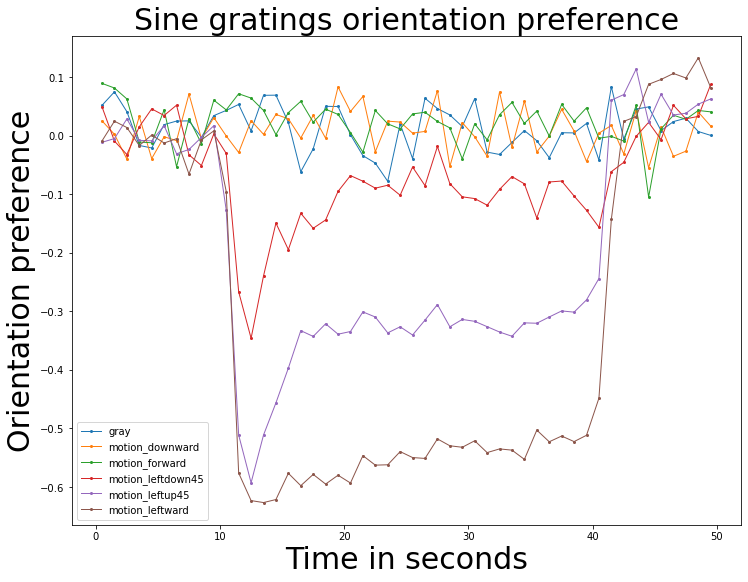

<module 'matplotlib.pyplot' from 'C:\\Users\\ag-bahl\\anaconda3\\envs\\py39\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [13]:
plot_pref(bin_df, pref='preference_absolute', time_marker=None,plt_sem = False)

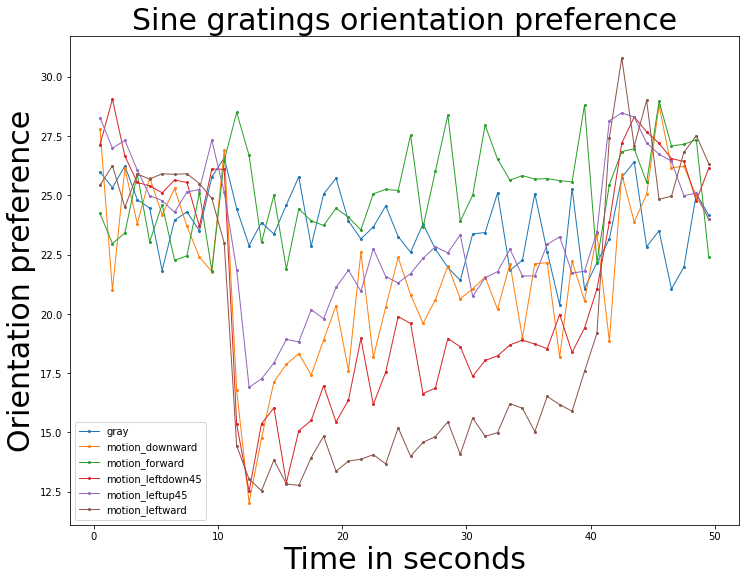

<module 'matplotlib.pyplot' from 'C:\\Users\\ag-bahl\\anaconda3\\envs\\py39\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [49]:
plot_pref(bin_df, pref='percentage_straight', time_marker=None,plt_sem = False)